# Project 1
## Projectile Motion: The Trajectory of a Cannon Shell

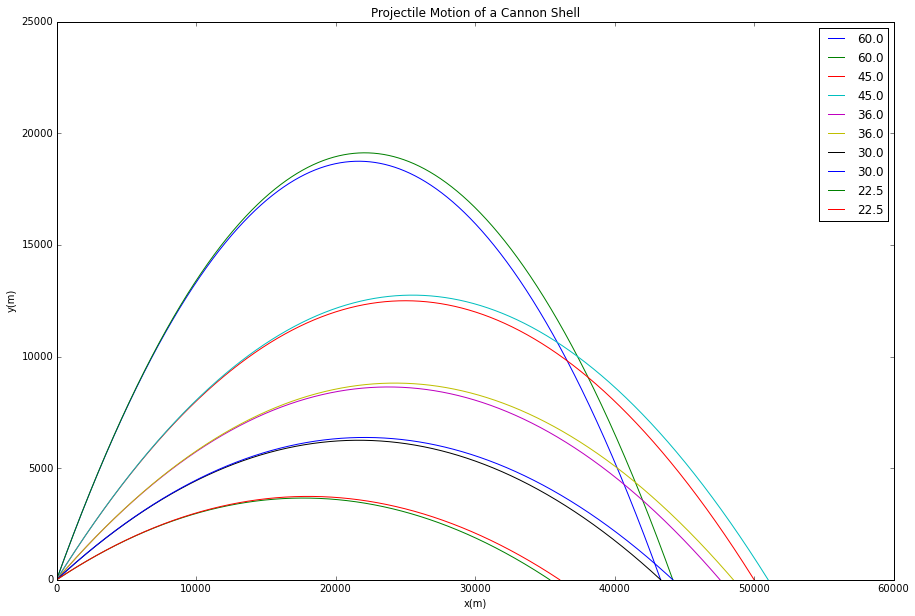

In [72]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

def projectile_motion(delta_t,initial_v, theta):
    
    '''Uses the input values to calculate the final position of a cannon fired at a given velocity and angle.
    
    input(s):
    delta_t the time steps
    initial_v the initial velocity of the projectile
    initial_altitude the altitude with respect to sea level that the cannon is fired from
    target_altitude the y position of the target we are trying to hit
    
    output(s):
    the final x position of the cannon shell
    ''' 
    gravity = 9.8
    
    # This is where we set the initial positions and velocities of our cannon shell
    x = []
    y = []
    x.append(0)
    y.append(0)
    x_velocity = initial_v*math.cos(theta)
    y_velocity = initial_v*math.sin(theta) 
     
    # This is where we perform the Euler Equations
    for i in range(1,10**6,1):
        x.append(x[i-1] + x_velocity*delta_t)
        y.append(y[i-1] + y_velocity*delta_t)
        
        # This is where we use the optional inputs to calculate the drag and gravity at different altitudes
        # f = B_m*math.sqrt((x_velocity**2)+ y_velocity**2)
        # gravity = 9.8
        
        # This is where we calculate the new velocities 
        y_velocity = y_velocity - gravity*delta_t #- f*y_velocity*delta_t)
        # x_velocity = x_velocity -  f*x_velocity*delta_t
        
        if y[i] <= 0:
            break
              
   
    
    if initial_v == 700:
        
        theta = theta/math.pi*180
        plt.title('Projectile Motion of a Cannon Shell')
        #plt.subplot(211)
        plt.ylim(0,25000)
        plt.plot(x,y,label=theta)                       
        plt.ylabel("y(m)")
        plt.xlabel("x(m)")
        plt.legend()
        
    if initial_v == 707:
        
        theta = theta/math.pi*180
        #plt.subplot(212)
        plt.ylim(0,25000)
        plt.plot(x,y,label=theta)                       
        plt.ylabel("y(m)")
        plt.xlabel("x(m)")
        plt.legend()
        
N = (3,4,5,6,8)
fig=plt.figure(figsize=(15, 10), dpi= 80, facecolor='w', edgecolor='k')

for i in (N):
    projectile_motion(0.01, 700, (math.pi)/i)
    projectile_motion(0.01, 707, (math.pi)/i)
    

## Results

The graph above shows the x and y positions of a cannon shell fired with two different initial velocities, and several different firing angles. These results also neglect drag and air resistance.  Looking at the graph and legend, we can see that the cannon shell reaches its maximum y position when it is fired at an angle of 60 degrees.  We can also see that the cannon shell reaches its maximum x position when it is fired at an angle of 45 degrees.  When the cannon shell is fired at either 60 degrees, or 30 degrees, it lands in the same spot.  The x components of the velocities are not the same for these two angles, so the only way that they could land at the same spot is if the time they spend in the air is different.  Logically speaking this would make sense.  A shell fired at a steeper angle, with the same initial velocity, would have a larger y component of the velocity.  It would travel higher, and spend more time in the air.  By changing the initial velocity of 700 m/s by 1 percent, we can change the landing position of our shell by several hundred meters.  This kind of change in the landing spot means that we would most likely miss our target by a large amount.